# Центр исследования потребительских данных. Ливерпуль

Ссылка на курс "Геопространственный анализ данных":\
https://darribas.org/gds_course/content/home.html

Ссылка на книгу "Геопространственный анализ данных":\
https://geographicdata.science/book/intro.html

Часть C\
https://darribas.org/gds_course/content/bC/diy_C.html

**Задачи проекта:**

*Задание 1. Настройка карты*

Используя три слоя (с кварталами, велодорожками, барами), выполнить следующие задачи:
*   Составить карту окрестностей Ливерпуля, со следующими параметрами настроек:
    *   Наличие заголовка;
    *   Отсутствие рамки с осями;
    *   Размер фигуры 10 на 11;
    *   Цвет единый для всех полигонов #525252 и прозрачность 50%;
    *   Ширина обводки полигонов («краев») составляет 0,3 ед. и цвет «#B9EBE3»;
    *   Базовая карта с акварельной темой Stamen.

\
*Задание 2. Непространственные манипуляции*

Используя слой с кварталами (LSOA):
*   Вычислить площадь каждого квартала;
*   Найти пять наименьших кварталов, из которых создать новый объект;
*   Создать многослойную карту Ливерпуля, на которой пять самых маленьких кварталов будут окрашены в красный цвет, а остальные — в черный.

\
*Задание 3. Различие улиц по гендерному признаку*

Используя данные УДС (загрузить самостоятельно), ответить на следующие вопросы:

*   На долю какой группы приходится большая общая длина улиц в Сарагосе: мужчин или женщин? На сколько?

## Этап 1. Загрузка данных и подготовка их к анализу

In [ ]:
# Установим библиотеку 'osmnx'
! pip install osmnx

In [ ]:
# Установим библиотеку 'contextily'
! pip install contextily

In [ ]:
# Импортируем библиотеки
import geopandas as gpd
import osmnx as ox
import contextily as cx
import matplotlib.pyplot as plt

In [ ]:
# Из библиотеки google.colab импортируем класс files
from google.colab import files

In [ ]:
# Создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving E08000012.dbf to E08000012 (1).dbf
Saving E08000012.prj to E08000012 (1).prj
Saving E08000012.shp to E08000012 (1).shp
Saving E08000012.shx to E08000012 (1).shx


In [ ]:
# !ls /content/sample_data

In [ ]:
# !ls

### LSOA

In [ ]:
# Извлечем данные с полигонами
liv = gpd.read_file('/content/E08000012.shp')

### Велодорожки

In [ ]:
# Извлечем данные по велосипедным дорожкам
bikepaths = ox.graph_from_place('Liverpool, UK', network_type='bike')

In [ ]:
# Определим количество линейных объектов
len(bikepaths)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


26868

### Бары

In [ ]:
# Извлечем данные точки интереса (POI) — бары
pubs = ox.geometries_from_place('Liverpool, UK', tags={'amenity':'bar'})

<ipython-input-82-c6cb58db0fe0>:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pubs = ox.geometries_from_place('Liverpool, UK', tags={'amenity':'bar'})


## Этап 2. Ответы на вопросы ислледования

### Задание 1. Настройка карты

Используя три слоя (с кварталами, велодорожками, барами), выполнить следующие задачи:

* Составить карту окрестностей Ливерпуля, со следующими параметрами настроек:
   *   Наличие заголовка;
   *   Отсутствие рамки с осями;
   *   Размер фигуры 10 на 11;
   *   Цвет единый для всех полигонов #525252 и прозрачность 50%;
   *   Ширина обводки полигонов («краев») составляет 0,3 ед. и цвет «#B9EBE3»;
   *   Базоваа карту с акварельной темой Stamen.

In [ ]:
# Выведем пять рандомных строчек датасета 'liv'
liv.sample(n=5, random_state=None)

,lsoa11cd,geometry
241,E01006772,"POLYGON ((342815.723 388020.542, 342813.554 38..."
16,E01006530,"POLYGON ((343016.076 386170.460, 342991.703 38..."
54,E01006571,"POLYGON ((340994.136 391431.273, 341000.000 39..."
197,E01006725,"POLYGON ((338291.461 389729.830, 338291.635 38..."
240,E01006771,"POLYGON ((343290.202 389088.857, 343307.834 38..."


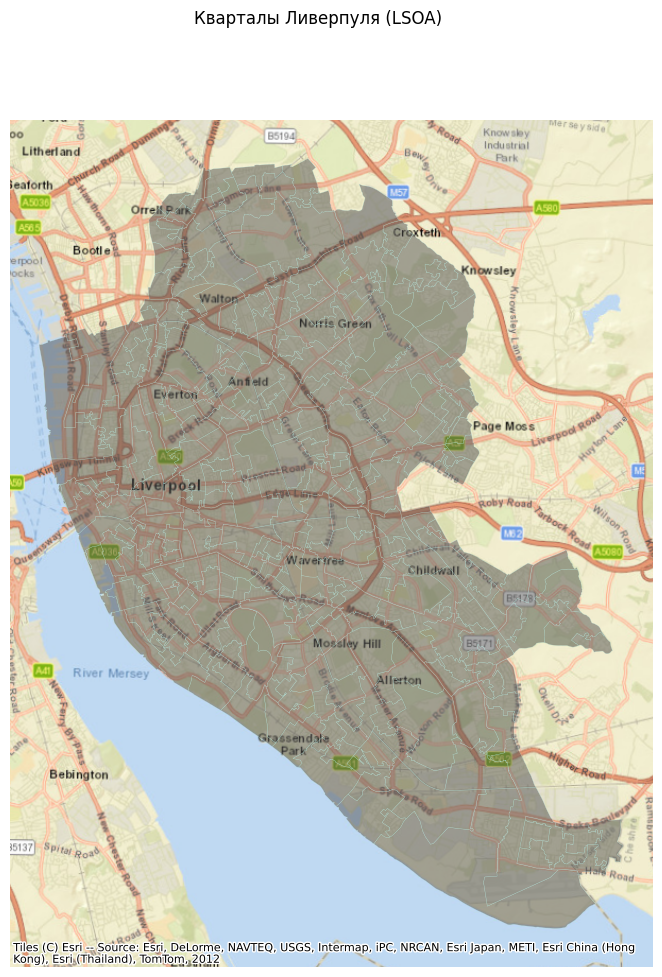

In [ ]:
# Настроим фигуру и оси графика с отображением всех кварталов Ливерпуля (LSOA)
# Зададаим параметры фигуры графика
f, ax = plt.subplots(1, figsize=(10, 11))
# Добавим слой с полигонами на оси
liv.plot(
    linewidth=0.3,
    facecolor='#525252',
    edgecolor='#B9EBE3',
    alpha=0.5,
    ax=ax
)
# Добавим заголовок графика
f.suptitle('Кварталы Ливерпуля (LSOA)')
# Добавим базовую карту (подоснову)
# Так как Stamen.Watercolor не отображается, заменим ее на Esri.WorldStreetMap
cx.add_basemap(
    ax=ax,
    crs=liv.crs,
    source=cx.providers.Esri.WorldStreetMap
    # alpha=0.9
)
# Уберем на графике рамку с осями
ax.set_axis_off()
# Отобразим график
plt.show();

### Задание 2. Непространственные манипуляции



Используя слой с кварталами (LSOA):
*   Вычислить площадь каждого квартала;
*   Найти в таблице пять наименьших кварталов, создать новый объект (например, самый маленький только с ними);
*   Создать многослойную карту Ливерпуля, на которой пять самых маленьких кварталов будут окрашены в красный цвет, а остальные — в черный.

In [ ]:
liv.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance_Survey_of_Great_Britain_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
# Вычислим площади каждого квартала и запишем их в отдельный столбец
liv['area_in_sqkm'] = liv.area / 1000000
liv.sample(n=5, random_state=None)

,lsoa11cd,geometry,area_in_sqkm
38,E01006552,"POLYGON ((336972.450 388845.856, 336974.787 38...",0.156711
203,E01006731,"POLYGON ((338832.740 394957.929, 338835.821 39...",0.172615
272,E01032508,"POLYGON ((338952.001 391213.000, 338953.416 39...",0.316776
162,E01006687,"POLYGON ((339373.261 385049.159, 339383.000 38...",0.855917
145,E01006670,"POLYGON ((341442.740 395246.551, 341446.570 39...",0.650042


In [ ]:
# Найдем в таблице пять наименьших кварталов и создадим из них новый объект
liv_min = liv.sort_values(by='area_in_sqkm')[:5]

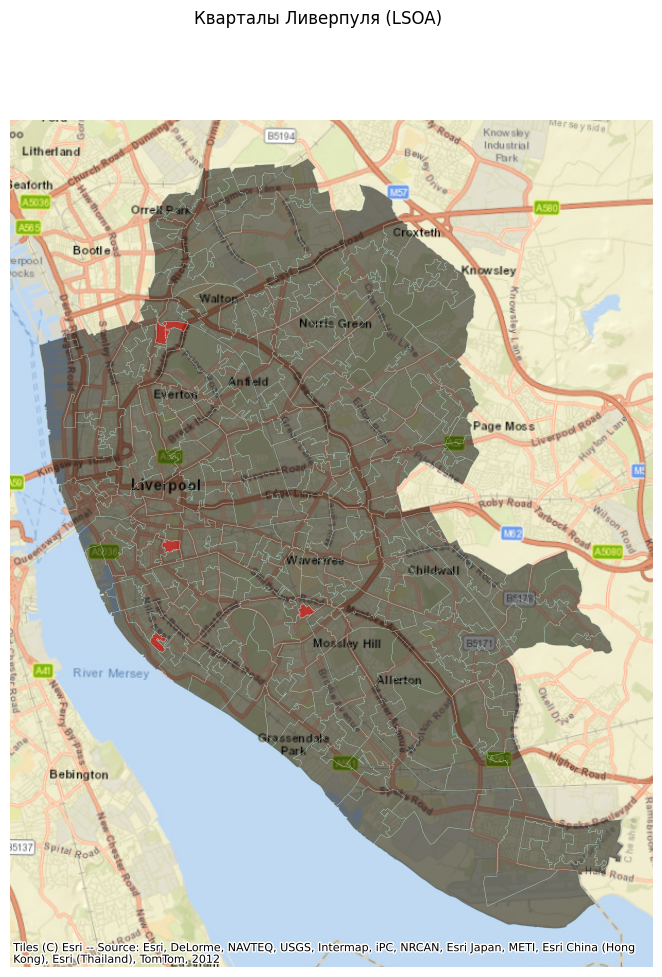

In [ ]:
# Создадим новую многослойную карту Ливерпуля,
# на которой пять самых маленьких кварталов будут окрашены в красный цвет, а остальные — в черный.
# Зададаим параметры фигуры графика
f, ax = plt.subplots(1, figsize=(10, 11))
# Добавим слой с полигонами на оси
liv.plot(
    linewidth=0.3,
    facecolor='black',
    edgecolor='#B9EBE3',
    alpha=0.5,
    ax=ax
)
# Добавим слой с пятью наименьшими кварталами
liv_min.plot(
    linewidth=0.3,
    facecolor='red',
    edgecolor='#B9EBE3',
    alpha=0.5,
    ax=ax
)
# Добавим заголовок графика
f.suptitle('Кварталы Ливерпуля (LSOA)')
# Добавим базовую карту (подоснову)
# Так как Stamen.Watercolor не отображается, заменим ее на Esri.WorldStreetMap
cx.add_basemap(
    ax=ax,
    crs=liv.crs,
    source=cx.providers.Esri.WorldStreetMap
    # alpha=0.9
)
# Уберем на графике рамку с осями
ax.set_axis_off()
# Отобразим график
plt.show();

### Задание 3. Различие улиц по гендерному признаку

Используя данные УДС (загрузить самостоятельно), ответить на следующие вопросы:

*   На долю какой группы приходится большая общая длина улиц в Сарагосе: мужчин или женщин? На сколько?

In [ ]:
# Загрузим УДС Сарагоса
streets = gpd.read_file('https://github.com/geochicasosm/lascallesdelasmujeres/raw/master/data/zaragoza/final_tile.geojson')
streets.sample(n=5, random_state=None)

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
937,Calle Javier Tomeo Estallo,229812806,,Male,,None,None,"LINESTRING (-0.83514 41.66973, -0.83482 41.670..."
70,Calle Ramón Pignatelli,229605795,,Male,,None,None,"LINESTRING (-1.02444 41.68105, -1.02385 41.681..."
1463,Calle Pablo Iglesias,119784210,,Male,,None,None,"LINESTRING (-0.88718 41.67734, -0.88718 41.67744)"
2227,Calle de Blas de Otero,652110466,,Male,,None,None,"LINESTRING (-0.88456 41.67076, -0.88449 41.670..."
135,Avenida de Cesáreo Alierta,24303034,,Male,,None,None,"LINESTRING (-0.87879 41.64646, -0.87883 41.646..."


In [ ]:
# Определим текущую проекцию слоя с улицами
streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Перенастроим текущую проекцию на проекцию с кодом epsg:25830
streets = streets.to_crs(epsg=25830)
# Проверим правильность выполнения функции
streets.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Улицы, названные в честь мужчин
men = streets.loc[streets['gender']=='Male', :]
men.sample(n=5, random_state=None)

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
3495,Calle de José Ramírez,82118632,,Male,,None,None,"LINESTRING (681361.992 4608001.761, 681316.771..."
916,Juan Peralta,142693589,,Male,,None,None,"LINESTRING (681411.785 4618134.921, 681377.405..."
1941,Calle Pedro Lucas Gallego,8455002,,Male,,None,None,"LINESTRING (674449.133 4612522.870, 674438.856..."
2223,Calle de Jorge Manrique,663252437,,Male,,None,None,"LINESTRING (675975.177 4615187.278, 675971.213..."
3488,Andador Casimiro,661720490,,Male,,None,None,"LINESTRING (681365.320 4608328.807, 681333.321..."


In [ ]:
# Улицы, названные в честь женщин
women = streets.loc[streets['gender']=='Female', :]
women.sample(n=5, random_state=None)

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
2865,Paseo de María Agustín,397870784,https://es.wikipedia.org/wiki/Mar%C3%ADa_Agust...,Female,,-,-,"LINESTRING (675812.356 4613105.598, 675809.522..."
3549,Calle de Nuestra Señora de Sancho Abarca,24566169,,Female,,-,-,"LINESTRING (676267.847 4611961.688, 676264.896..."
921,Calle de la Virgen,409573345,https://es.wikipedia.org/wiki/Mar%C3%ADa_(madr...,Female,,-,-,"LINESTRING (680743.449 4617424.635, 680711.704..."
920,Calle de la Virgen,409573344,https://es.wikipedia.org/wiki/Mar%C3%ADa_(madr...,Female,,-,-,"LINESTRING (680711.397 4617480.748, 680706.627..."
1031,Urbanización Maitena,252475966,https://es.wikipedia.org/wiki/Maitena,Female,,-,-,"LINESTRING (669903.068 4615547.942, 669901.308..."


In [ ]:
# Посчитаем длину улиц, названных в честь мужчин
men['length_in_m'] = men.length
men.head(3)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry,length_in_m
0,Calle Camilo José Cela,78317710,,Male,,None,None,"LINESTRING (663603.811 4621073.573, 663567.846...",37.338828
1,Calle Mariano Domingo Ruiz,66375846,,Male,,None,None,"LINESTRING (663722.643 4621035.106, 663669.127...",104.510732
2,Calle Camilo José Cela,78317716,,Male,,None,None,"LINESTRING (663924.898 4620911.062, 663887.341...",365.969719


In [ ]:
# Посчитаем длину улиц, названных в честь женщин
women['length_in_m'] = women.length
women.head(3)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry,length_in_m
11,Calle Nuestra Señora del Carmen,49025136,https://es.wikipedia.org/wiki/Virgen_del_Carmen,Female,,-,-,"LINESTRING (663963.650 4620386.530, 663849.834...",117.721112
13,Plaza Arnal Gorría,226700443,,Female,,-,-,"LINESTRING (663946.258 4620430.078, 663935.318...",65.738343
14,Calle Nuestra Señora del Carmen,38298205,https://es.wikipedia.org/wiki/Virgen_del_Carmen,Female,,-,-,"LINESTRING (664055.083 4620280.846, 664049.674...",262.099900


In [ ]:
# Посчитаем общую длину улиц для "мужской" группы
men_length = men['length_in_m'].sum()
men_length

398185.6550745432

In [ ]:
# Посчитаем общую длину улиц для "женской" группы
women_length = women['length_in_m'].sum()
women_length

89069.23496393918

**Ответ:** На долю мужской группы приходится набольшая общая длина улиц в Сарагосе.

In [ ]:
# Посчитаем на сколько общая длина улиц, названных в честь мужчин больше общей длины улиц, названных в честь женщин
length_diff = men_length - women_length
length_diff

309116.420110604

**Ответ:** На 309116 м (309,2 км) общая длина улиц, названных в честь мужчин больше общей длины улиц, названных в честь женщин.

In [ ]:
# Посчитаем долю улиц, названных в честь мужчин, относительно общей длины улиц
men_share = round(men_length / (men_length + women_length) * 100, 1)
men_share

81.7

In [ ]:
# Посчитаем долю улиц, названных в честь женщин, относительно общей длины улиц
women_share = round(women_length / (men_length + women_length) * 100, 1)
women_share

18.3

**Ответ:** Доля улиц, названных в честь мужчин, от общей длины улиц составляет 81.7%, в честь женщин — 18.3%.

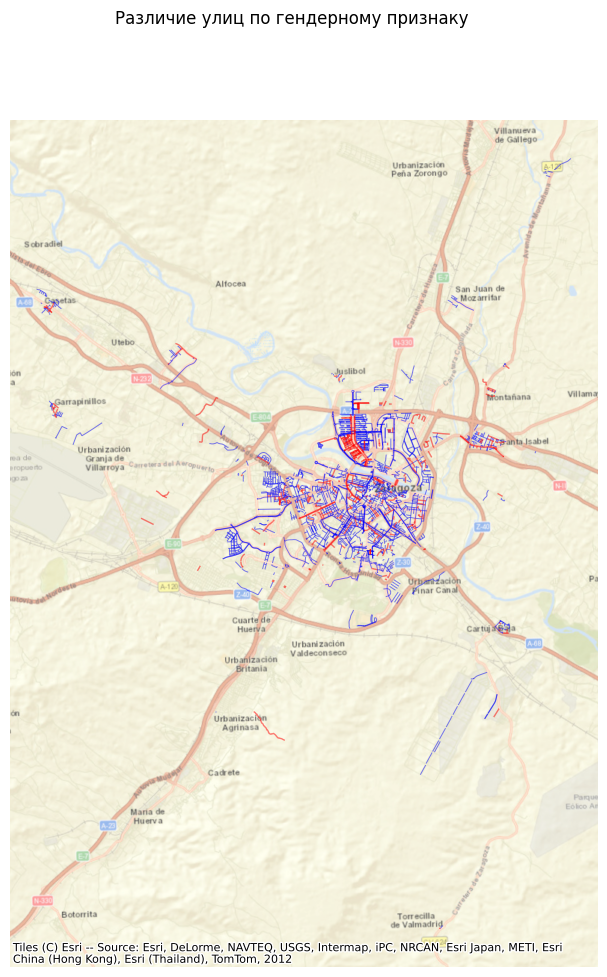

In [ ]:
# Нанесем улицы, разбитые на группы, на карту
# Пусть улицы, названные в честь мужчин, будут отображены синим цветом, в честь женщин — красным
# Зададаим параметры фигуры графика
f, ax = plt.subplots(1, figsize=(10, 11))
# Добавим слой c улицами, названными в честь мужчин
men.plot(
    linewidth=0.7,
    facecolor='blue',
    edgecolor='blue',
    alpha=0.5,
    ax=ax
)
# Добавим слой c улицами, названными в честь женщин
women.plot(
    linewidth=1,
    facecolor='red',
    edgecolor='red',
    alpha=0.5,
    ax=ax
)
# Добавим заголовок графика
f.suptitle('Различие улиц по гендерному признаку')
# Добавим базовую карту (подоснову)
# Так как Stamen.Watercolor не отображается, заменим ее на Esri.WorldStreetMap
cx.add_basemap(
    ax=ax,
    crs=men.crs,
    source=cx.providers.Esri.WorldStreetMap,
    alpha=0.7
)
# Уберем на графике рамку с осями
ax.set_axis_off()
# Отобразим график
plt.show();

## Этап 3. Результаты исследования

### Выводы

1. Была составлена карта окрестностей Ливерпуля, с рядом заданных параметров настроек;

2. На основании слоя с кварталами Ливерпуля (LSOA):
   *   Вычеслена площадь каждого квартала;
   *   Найдены пять наименьших кварталов, из которых был создан новый объект;
   *   Создана многослойная карта Ливерпуля, на которой пять самых маленьких кварталов окрашены в красный цвет, а остальные — в черный;
   
3. Используя данные УДС Сарагоса, был проведен краткий анализ различия улиц по гендерному признаку:
   *   На 309116 м (309,2 км) общая длина улиц, названных в честь мужчин больше общей длины улиц, названных в честь женщин;
   *   Доля улиц, названных в честь мужчин, от общей длины улиц составляет 81.7%, в честь женщин — 18.3%.